# Pipelines

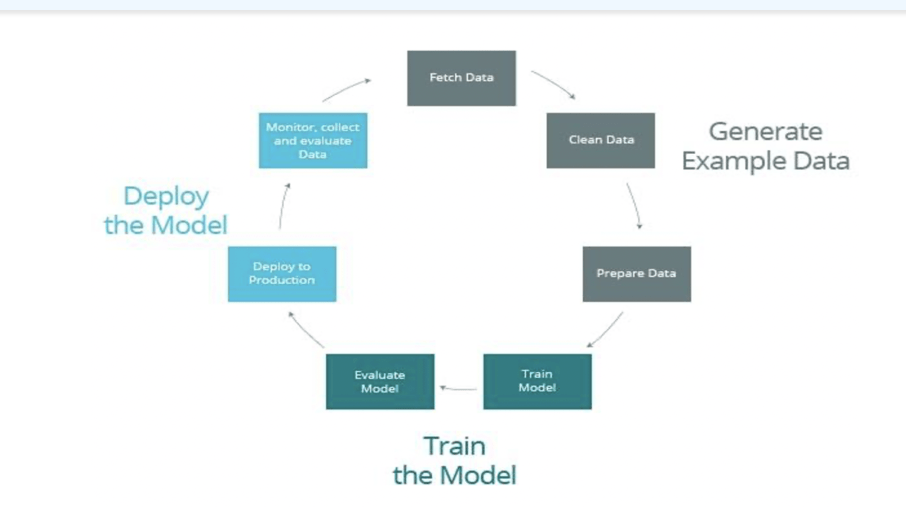

1. Qué es un pipeline ?
   Un pipeline en machine learning es una herramienta que organiza  y encadena multiples pasos en el flujo de procesamiento de datos y entrenamiento de       modelos en un solo proceso.
   - Preprocesamiento de datos (escalado, imputación de valores nulos, codificación de categorías).
   - Selección de caracteristicas.
   - En trenamiento de un modelo
   Un pipeline automatiza y standariza el flujo de trabajo, asegurando que todos los pasos se ejecuten en el orden correcto y reduciendo errores por          procesamiento manual.

2. Que problemas resuelven los Pipelines?
   - Reproducibilidad: Facilitan la repetición del mismo flujo de procesamiento en diferentes conjuntos de datos (entrenamiento, validación, prueba).
 
4. Modularidad

   Permiten estructurar el flujo en pasos individuales que son fáciles de modificar o reemplazar.

6. Evitan fuga de datos.

   Al realizar preprocesamiento solo en datos de entrenamiento y aplicar la misma transformación a los datos de prueba

8. Mantenimiento más simple

   Al encapsular todo el flujo, es más fácil actualizar, depurar o compartir el trabajo.

# Ejemplo 1
## Contexto
Tenemos un conjunto de datos con caracteristicas numéricas y categoricas y se quiere:
1. Escalar las variables.
2. Codificar las variables catagóricas.
3. Entrenar un modelo de regresión logística.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
data ={
    "edad":[25,35,45,32,23],
    "ciudad":["Paris","Tokio","Nueva York", "Tokio", "Bogotá"],
    "ingresos": [40000, 50000, 60000, 52000, 43000],
    "compro":[0,1,1,0,0]
}

df = pd.DataFrame(data)
# Separar caracteristicas y etiquetas
X = df[["edad", "ciudad", "ingresos"]]
y = df["compro"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

# Definir columnas numericas y categoricas
numeric_features= ["edad", "ingresos"]
categorical_features = ["ciudad"]

# Crear instancias de transformadores para cada tipo
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

#Combinamos los transformadores en un ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Creamos el pipeline

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression())
    ]
)

#Entrenar el pipeline
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)

print("Presicion en datos de prueba ", score)

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
data = sns.load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Construccionde los datos

En la linea dos X=data[["sex", "age", "fare","embark_town"]] el lado derecho retorna una estructura bidimencional de pandas esto incluye los valores de las columnas y el nombre de cada columna o caracteristica (esto es asi por que se retorna un conjunto de caracteristicas)

En la linea 3 y = data["survived"], se retorna una serie dado que es la salida y por tanto las series no retornan el nombre de la caracteristica de alguna manera esta esta implícita "y"

In [5]:
# Seleccionar las caracteristicas
X=data[["sex", "age", "fare","embark_town"]]
y = data["survived"]


In [7]:
# Verificamos valores nullos
print("Valores nulos por columna")
print(X.isnull().sum())
print(X.describe())

Valores nulos por columna
sex              0
age            177
fare             0
embark_town      2
dtype: int64
              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [ ]:
print("X", X)

In [ ]:
#print("Y", y)

In [9]:
#Division de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print("Datos de entrenamiento")
print(X_train, y_train)

Datos de entrenamiento
        sex   age      fare  embark_town
331    male  45.5   28.5000  Southampton
733    male  23.0   13.0000  Southampton
382    male  32.0    7.9250  Southampton
704    male  26.0    7.8542  Southampton
813  female   6.0   31.2750  Southampton
..      ...   ...       ...          ...
106  female  21.0    7.6500  Southampton
270    male   NaN   31.0000  Southampton
860    male  41.0   14.1083  Southampton
435  female  14.0  120.0000  Southampton
102    male  21.0   77.2875  Southampton

[712 rows x 4 columns] 331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 712, dtype: int64


# Crear las transformaciones por columnas
numeric_features = ["age", "fare"]   #Se crea lista de nombres de caracteristicas numéricas
categorical_features = ["sex", "embark_town"]

In [11]:
# Listar columnas numéricas y categóricas
numeric_features = ["age", "fare"]
categorical_features = ["sex", "embark_town"]

# 1. Transformador numerico
Se crea un pipeline con dos pasos ordenados, paso 1 el imputador que rellena los valores retantes con la mediana,
En el paso 2, Se escaliza los datos

# 2. Transformador categorical_transforme el pipeline tien dos pasos, un imputador sobre las columnas catagoricas que rellena los valores nulos o faltantes con la constante "missing".
Esto es importante por que los modelos no trabajan con valores faltantes o nulos

# Nota importante
Cuando varios pipelines de transformacion como en caso que tenemos categorical_transformer y el numerical_transformer, se integran en un Columntransformer, esto permite aplicar trasnformaciones especificas a diferentes subconjuntos de columnas en paralelo. Cada paso en este proceso tiene un propósito clave para garantizar que los datos esten completamente preparados antes de entrenar el modelo

### En los pipeline se declaran los pasos a realizar.

In [13]:
# Crear transformadores específicos
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Imputar valores nulos
    ("scaler", StandardScaler())  # Escalar datos numéricos
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),  # Imputar nulos
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Codificar variables categóricas
])

# Integración de los transformadores por grupos o columnas

En un dataset, diferentes columnas pueden requerir diferentes tipos de procesamiento, por ejemplo
- Las columnas numericas age , fare Requieren imputacion y escalado
- Columnas categoricas (sex, embark_town): Requieren imputación y codificación.

## ColumnTransformer
Permite dividir las columnas en diferentes subconjuntos y aplicarles el transformador correspondiente de manera simultánea o paralela.

## Procesamiento paralelo
- Los pipelines individuales se ejecutan en paralelo (Como el de categorías o el numérico) se ejecutan en paralelo, optimizando el tiempo de           preprocesamiento.
## Integración completa
Combina la salida de todos los pipelines en un único conjunto de datos transformados.

In [15]:
# Crear el ColumnTransformer con todas las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [28]:
# 4. Crear el pipeline completo
print("Clasificador RandomForestClassifier")
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Aplicar preprocesamiento
    ("classifier", RandomForestClassifier(random_state=42))  # Modelo
])


Clasificador RandomForestClassifier


In [30]:
# 5. Entrenar el modelo
pipeline.fit(X_train, y_train)

# 6. Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# 7. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

# 8. Validar la salida del transformador (opcional)
# Inspeccionar los datos transformados
X_train_transformed = preprocessor.transform(X_train)
print("\nForma de los datos transformados de entrenamiento:")
print(X_train_transformed.shape)


Precisión del modelo: 0.79

Forma de los datos transformados de entrenamiento:
(712, 8)


In [46]:
# 4. Crear el pipeline completo
from sklearn.svm import SVC

print("Clasificador Maquina de soporte vectorial SVM")
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Aplicar preprocesamiento
    ("classifier", SVC(kernel='linear',C=1.0,random_state=42, probability = True))  # Modelo
])

Clasificador Maquina de soporte vectorial SVM


In [48]:
# 5. Entrenar el modelo
pipeline.fit(X_train, y_train)

# 6. Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# 7. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

# 8. Validar la salida del transformador (opcional)
# Inspeccionar los datos transformados
X_train_transformed = preprocessor.transform(X_train)
print("\nForma de los datos transformados de entrenamiento:")
print(X_train_transformed.shape)



Precisión del modelo: 0.78

Forma de los datos transformados de entrenamiento:
(712, 8)


In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay


In [58]:
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test,y_pred)
print(f"\n Precisión del modelo : {accuracy:.2f}")

matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusion")
print(matriz_confusion)


 Precisión del modelo : 0.78
Matriz de confusion
[[94 16]
 [24 45]]
